In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


in thisdata there are categorical and continuous both have present and 31647 rows and 18 columns 

In [3]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
data.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [3]:
data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

we see no nullvalues present in this data

In [6]:
#this give brief description about columntype,nonullvalues,indextype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [4]:
# in this data id is nominal data which is not contribute to target hence remove this from dataset
data.drop(['ID','education','job'],axis=1,inplace=True)


In [5]:
for i in data.columns:
    print(data[i].value_counts())

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
no     31062
yes      585
Name: default, dtype: int64
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64
yes    17584
no     14063
Name: housing, dtype: int64
no     26516
yes     5131
Name: loan, dtype: int64
cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64
20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10

we see that all value is its showing origional datatype 

In [6]:
#seprating numerical and categorical columns

#checking categerical columns\
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]== "object":
        categorical_col.append(i)
print('categorical columns:',categorical_col)
print('\n')


#checking numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col)

categorical columns: ['marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [7]:
# checking no of unique values in each columns
data.nunique().to_frame('no.of uniqes value')

,no.of uniqes value
age,76
marital,3
default,2
balance,6326
housing,2
loan,2
contact,3
day,31
month,12
duration,1454


In [12]:
#checking the list of counts of target
data['subscribed'].unique()

array(['no', 'yes'], dtype=object)

wee see that in many columns there is negative values is present hence convert this value to positive becuse our model not 
understand by negative hence negative change to o or positive one 

In [8]:
data['balance']=data['balance'].apply(lambda x: 0 if x<0 else x)

In [9]:
data['pdays']= data['pdays'].apply(lambda x: 0 if x<0 else x)

In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1390.690050,15.835466,258.113534,2.765697,40.395203,0.574272
std,10.625134,3012.629543,8.337097,257.118973,3.113830,98.983097,2.422529
min,18.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,0.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,0.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


 from this we observe that
1. counts of all columns is same hence no missing null vlues present
2. in column pdays and previous columns there is mean vlue is lower than standard deviation hence outliern is present
3  in duration column difference between third quantile and max is more hence chaces of outliers

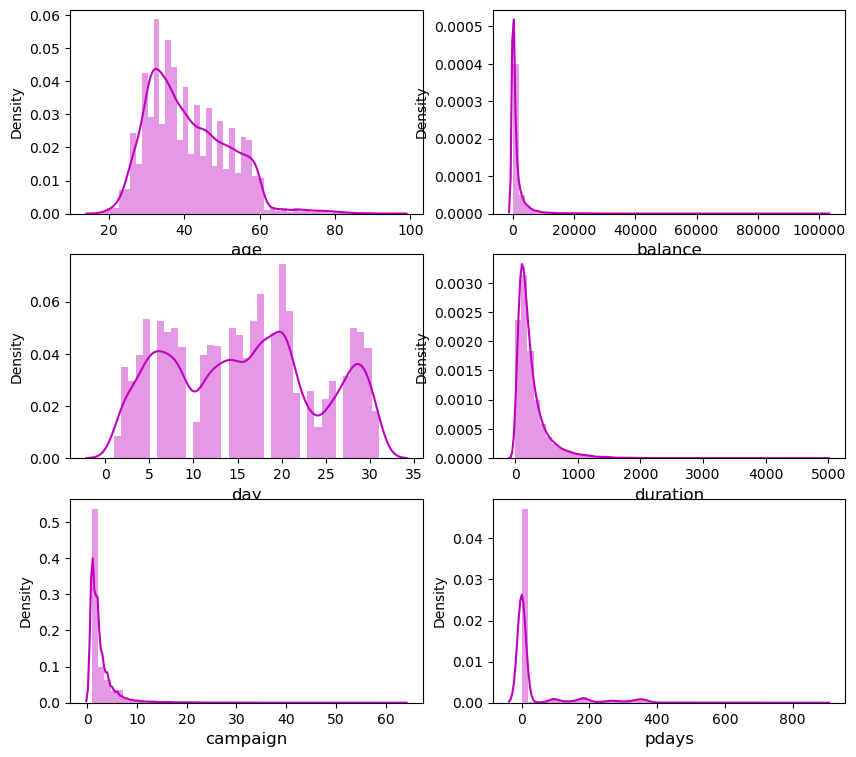

In [19]:
#lets check howthe data has been distributed in remaining coloumns
plt.figure(figsize=(10,9), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(data[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()   

we see that skewness present in two columns and also outlier present hence removeby methods

<Figure size 1000x600 with 0 Axes>

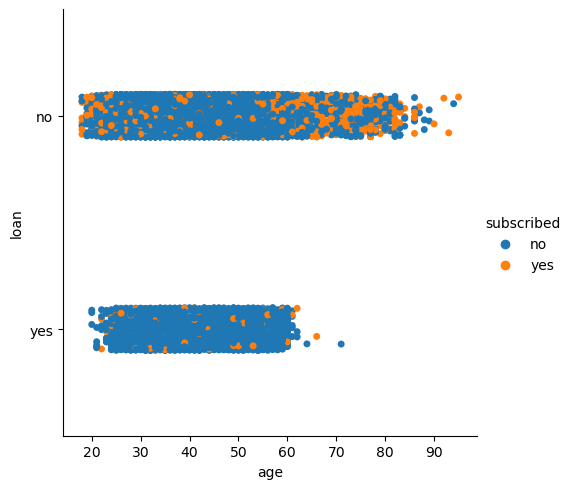

In [22]:
#vsiualize our data
plt.figure(figsize=(10,6))
sns.catplot(x='age',y='loan',data=data,hue='subscribed')
plt.show()

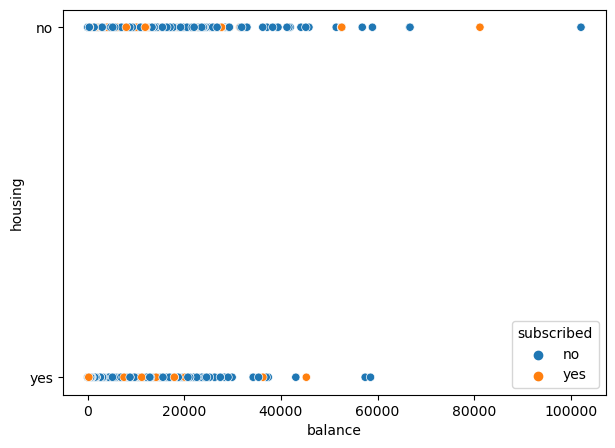

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='balance',y='housing',data=data,hue='subscribed')
plt.show()

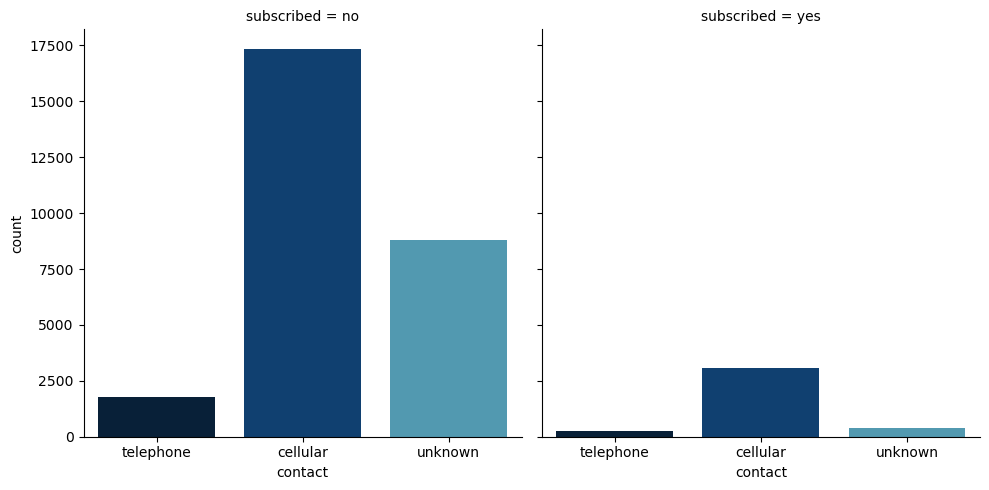

In [5]:
sns.catplot(x= 'contact', col='subscribed', palette= 'ocean',kind='count',data=data)
plt.show()

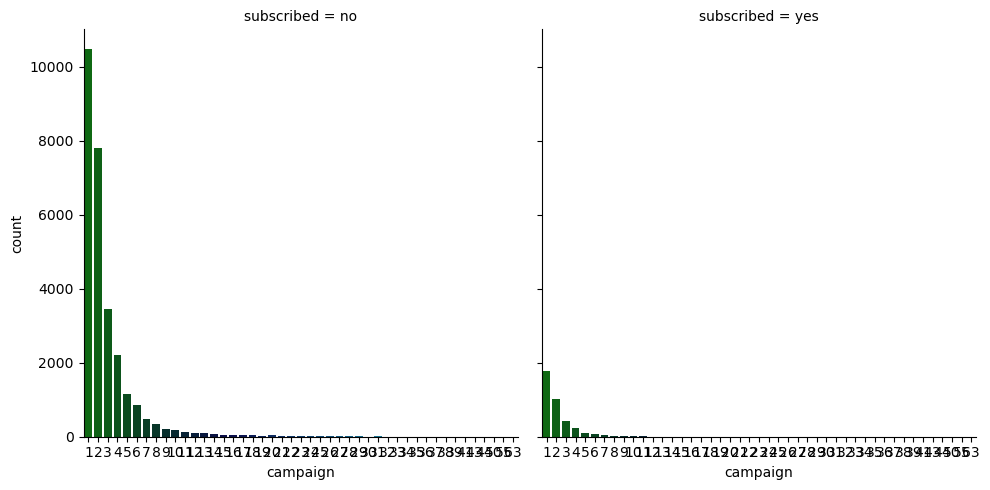

In [6]:
sns.catplot(x= 'campaign', col='subscribed', palette= 'ocean',kind='count',data=data)
plt.show()

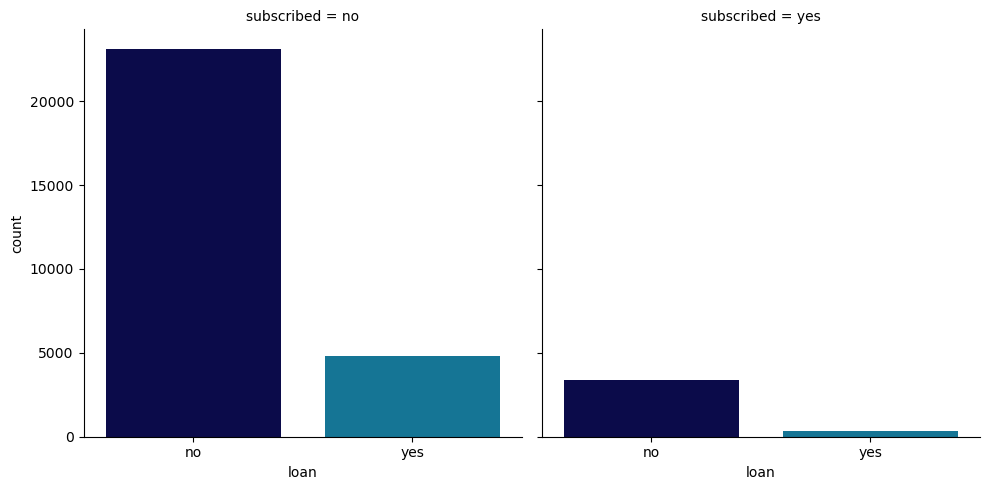

In [8]:
sns.catplot(x= 'loan', col='subscribed', palette= 'ocean',kind='count',data=data)
plt.show()

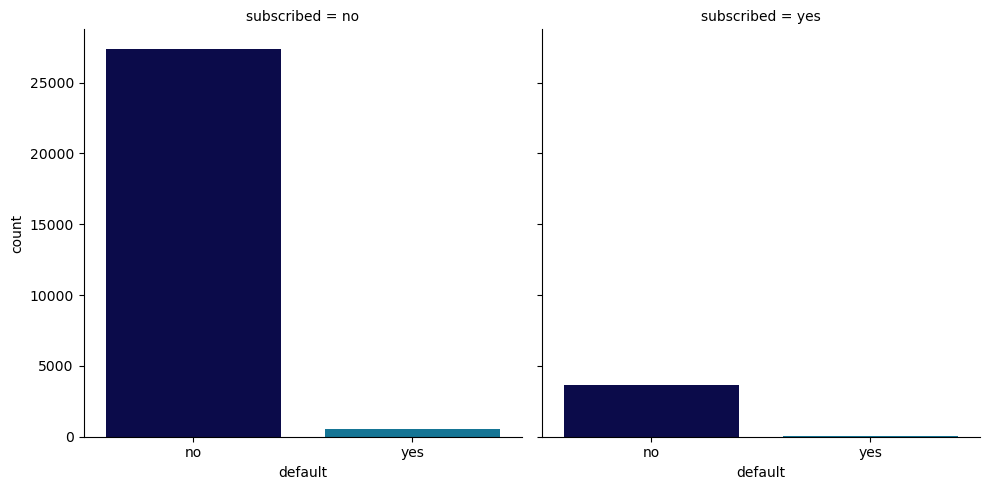

In [11]:
sns.catplot(x= 'default', col='subscribed', palette= 'ocean',kind='count',data=data)
plt.show()

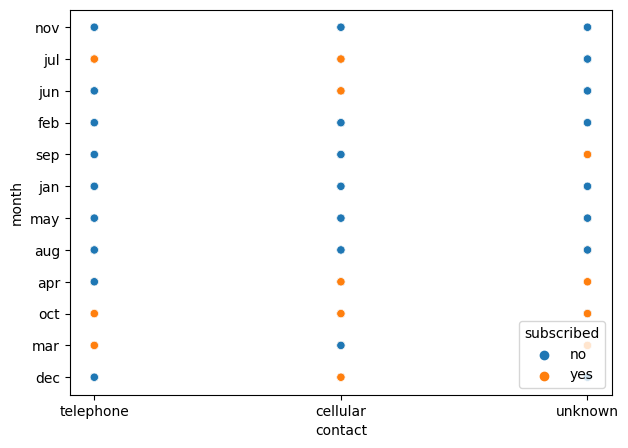

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='contact',y='month',data=data,hue='subscribed')
plt.show()

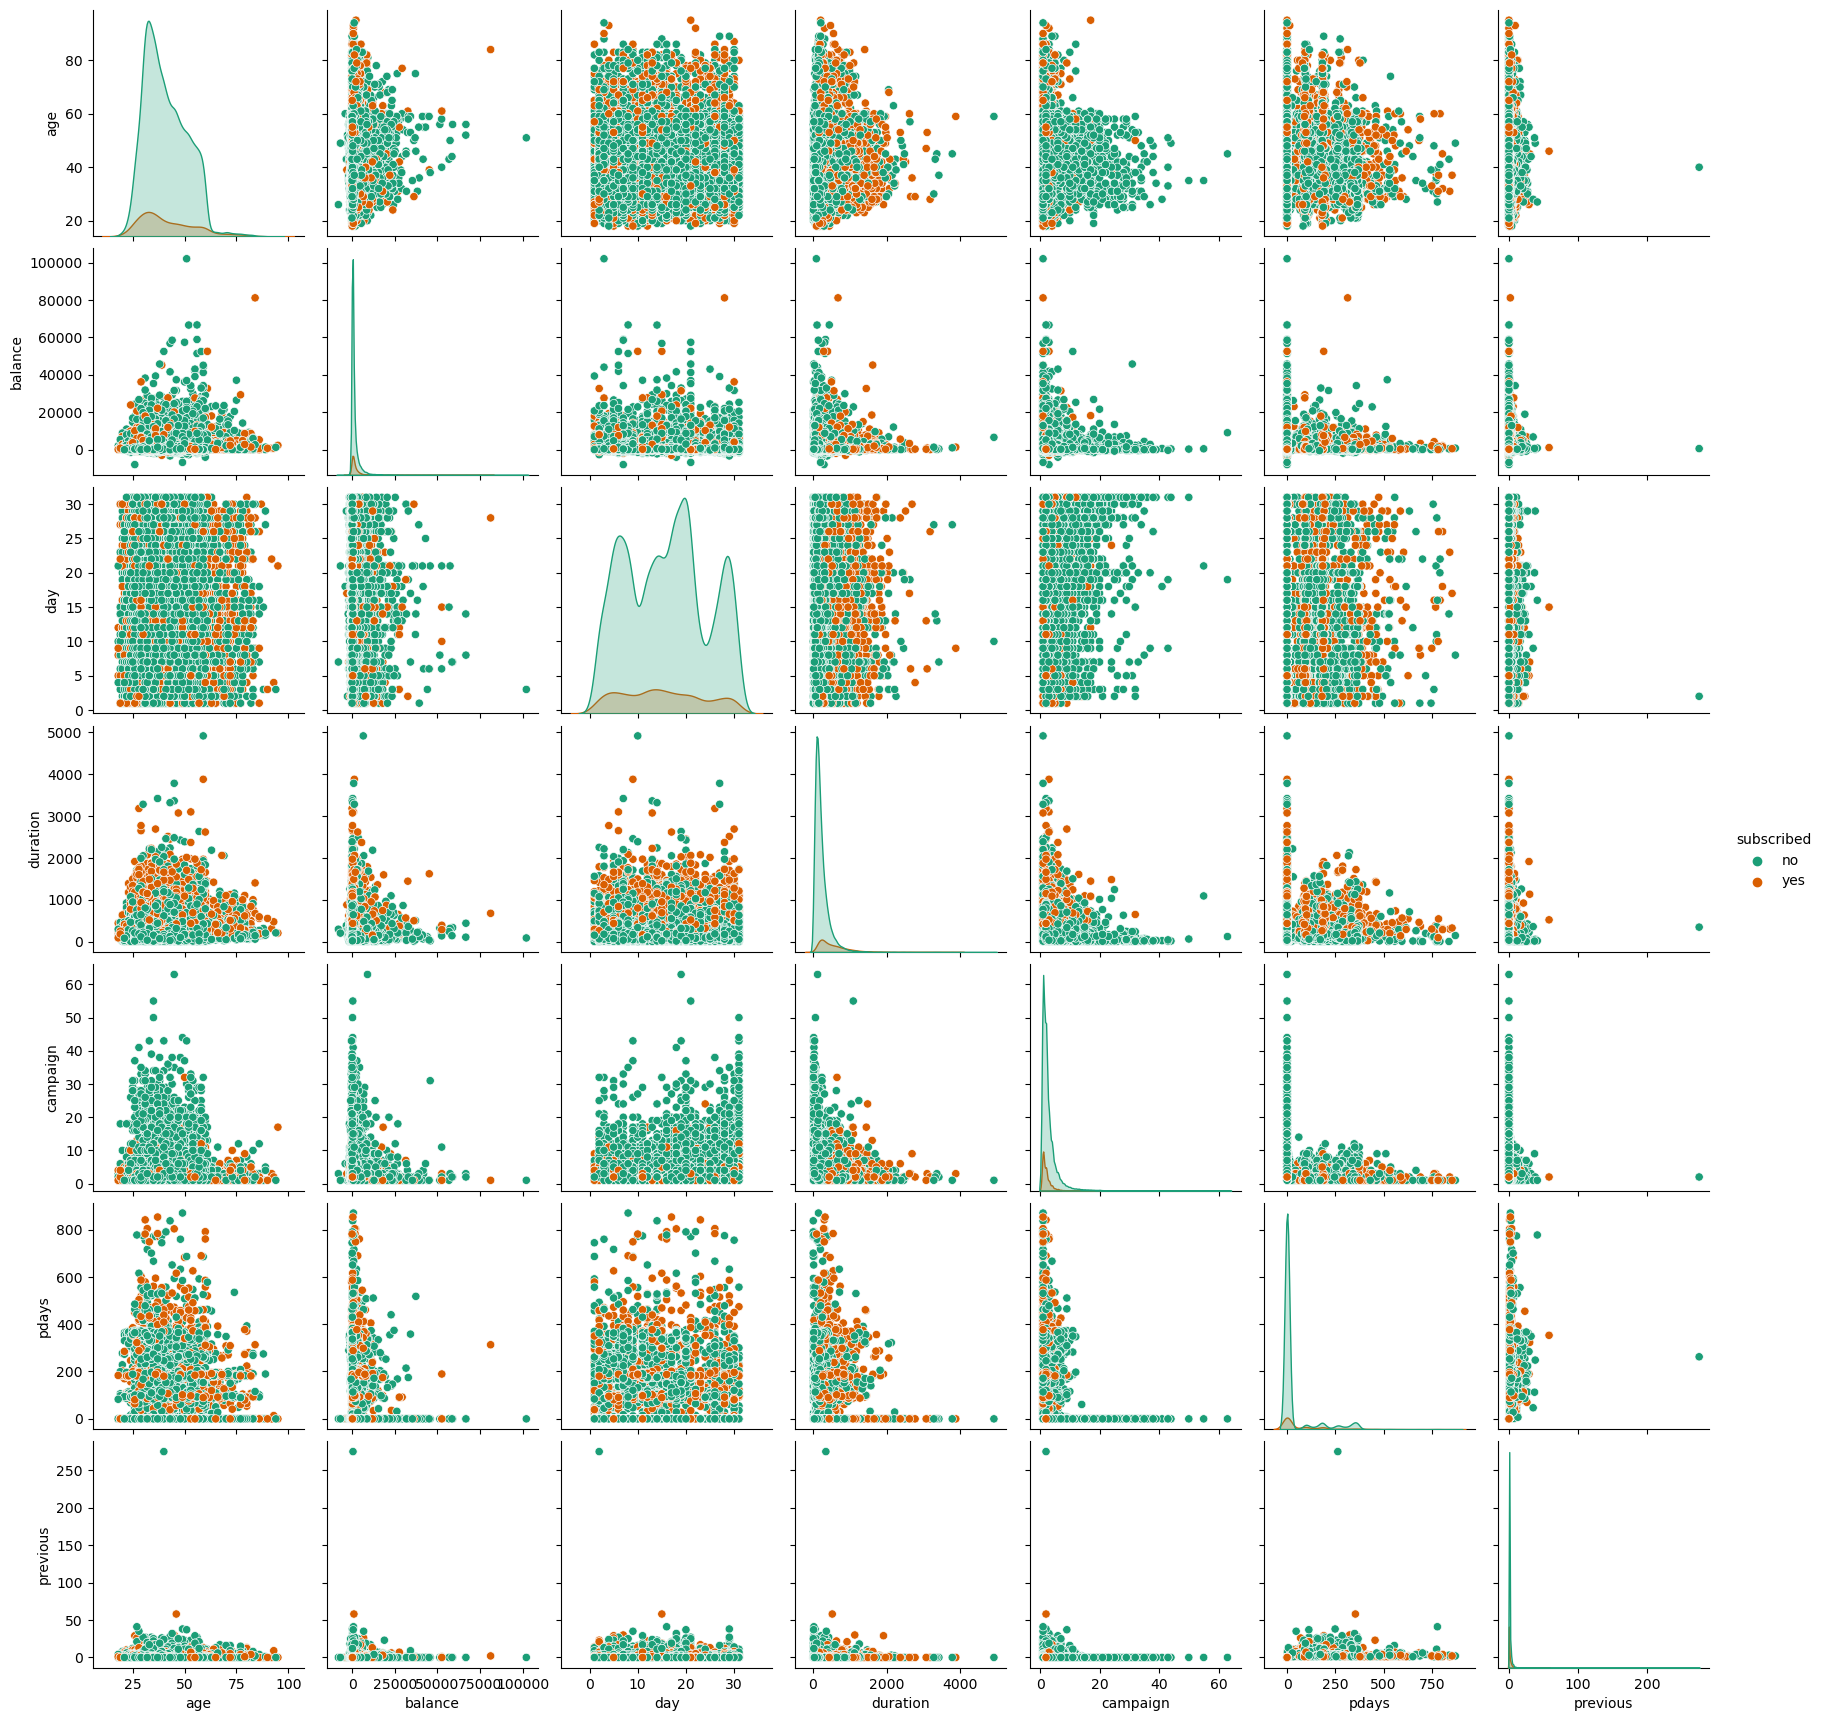

In [14]:
#multivariate analysis
sns.pairplot(data, hue='subscribed', palette= 'Dark2')
plt.show()

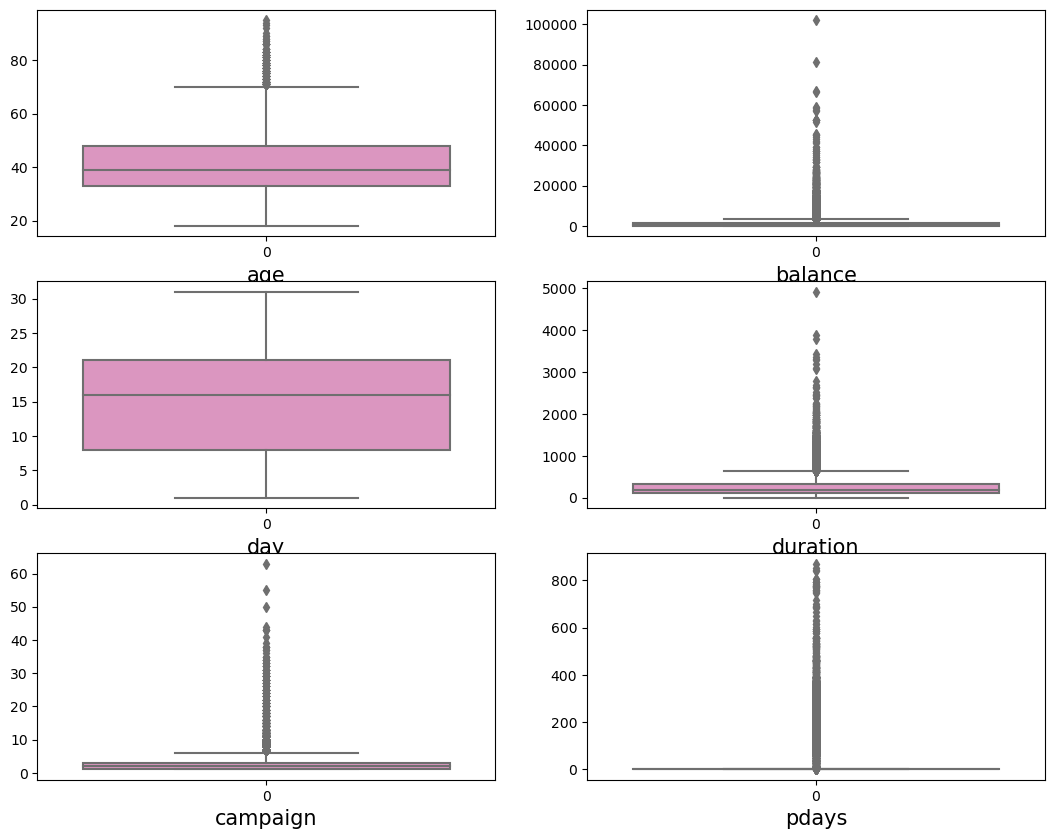

In [12]:
#lets check for outliers
plt.figure(figsize= (13,10), facecolor= 'white')
plotnumber= 1
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2, plotnumber)
        sns.boxplot(data[col], palette= 'Set2_r')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()    

here have 3 columns which have outliers so treat them for better performance of our model by using zscore method

In [13]:
from scipy.stats import zscore

out_features = data[['age','balance','duration','pdays','campaign']]
z= np.abs(zscore(out_features))
z

,age,balance,duration,pdays,campaign
0,1.415793,0.180015,0.832754,0.408108,0.245906
1,0.937156,0.460631,0.649957,0.408108,0.245906
2,1.313627,0.165868,0.070449,0.408108,0.567059
3,1.509911,0.629463,2.368149,0.440535,0.567059
4,0.937156,0.422126,0.474054,0.408108,0.567059
...,...,...,...,...,...
31642,1.125392,0.461627,0.552724,0.408108,0.245906
31643,1.133439,0.335490,0.699635,0.408108,0.245906
31644,0.843038,0.358062,0.859979,0.408108,0.075247
31645,1.509911,0.386941,0.918319,2.996567,1.359859


In [14]:
#threshold=3
np.where(z>3)

(array([   21,    26,    36, ..., 31622, 31622, 31646], dtype=int64),
 array([4, 1, 3, ..., 0, 3, 2], dtype=int64))

In [15]:
# now removing data above zscore and creating new dataframe
data1 = data[(z<3).all(axis=1)]

data1.shape

(28431, 15)

In [16]:
# skewness our data 
data1.skew()

age          0.442174
balance      2.515277
day          0.075406
duration     1.594455
campaign     2.050140
pdays        2.710154
previous    58.133682
dtype: float64

In [17]:
#apply cube root method to remove skewness in volume
data1['balance']= np.cbrt(data1['balance'])
data1['duration']= np.cbrt(data1['duration'])
data1['campaign']= np.cbrt(data1['campaign'])
data1['pdays']= np.cbrt(data1['pdays'])
data1['previous']= np.cbrt(data1['previous'])

In [18]:
data1.skew()

age         0.442174
balance     0.254159
day         0.075406
duration    0.303646
campaign    0.991846
pdays       2.111363
previous    2.413795
dtype: float64

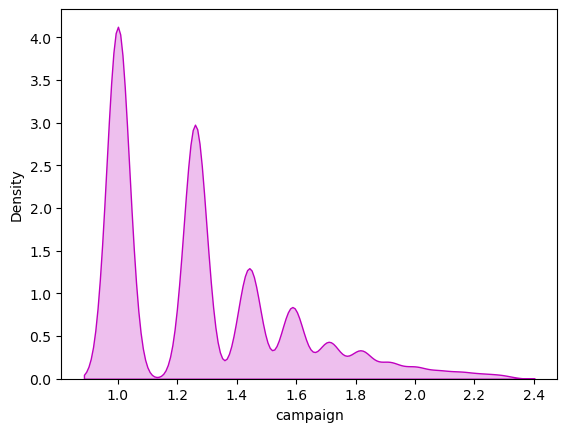

In [20]:
sns.distplot(data1['campaign'], color='m',hist=False,kde_kws= {'shade':True})
plt.show()

In [22]:
#now encoding categorical columns with ordinalencoder
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in data1.columns:
    if data1[i].dtypes== 'object':
        data1[i]= oe.fit_transform(data1[i].values.reshape(-1,1))
data1       

,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,1.0,0.0,12.456918,0.0,0.0,1.0,19,9.0,3.530348,1.259921,0.000000,0.000000,3.0,0.0
1,31,1.0,0.0,1.442250,0.0,0.0,0.0,20,5.0,4.497941,1.259921,0.000000,0.000000,3.0,0.0
2,27,1.0,0.0,9.622603,1.0,0.0,0.0,18,5.0,6.214465,1.000000,0.000000,0.000000,3.0,0.0
3,57,0.0,0.0,14.868480,0.0,0.0,0.0,22,6.0,9.535417,1.000000,4.379519,1.442250,2.0,1.0
4,31,1.0,0.0,4.918685,1.0,0.0,0.0,4,3.0,7.243156,1.000000,0.000000,0.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,37,2.0,0.0,10.939057,0.0,0.0,2.0,6,6.0,7.617412,1.259921,0.000000,0.000000,3.0,0.0
31642,29,2.0,0.0,0.000000,1.0,0.0,0.0,12,8.0,4.876999,1.259921,0.000000,0.000000,3.0,0.0
31643,53,0.0,0.0,7.243156,0.0,1.0,0.0,5,6.0,7.594363,1.259921,0.000000,0.000000,3.0,1.0
31644,32,2.0,0.0,6.782423,0.0,0.0,0.0,7,1.0,3.332222,1.442250,0.000000,0.000000,3.0,0.0


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28431 entries, 0 to 31645
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         28431 non-null  int64  
 1   marital     28431 non-null  float64
 2   default     28431 non-null  float64
 3   balance     28431 non-null  float64
 4   housing     28431 non-null  float64
 5   loan        28431 non-null  float64
 6   contact     28431 non-null  float64
 7   day         28431 non-null  int64  
 8   month       28431 non-null  float64
 9   duration    28431 non-null  float64
 10  campaign    28431 non-null  float64
 11  pdays       28431 non-null  float64
 12  previous    28431 non-null  float64
 13  poutcome    28431 non-null  float64
 14  subscribed  28431 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 3.5 MB


In [24]:
data1.describe()

,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000
mean,40.653301,1.168513,0.019204,7.665302,0.551476,0.166684,0.665330,15.838873,5.492702,5.772331,1.280170,0.817825,0.204010,2.649080,0.103338
std,10.088555,0.606091,0.137245,5.214024,0.497352,0.372700,0.910459,8.389714,2.991030,1.563420,0.295505,1.994869,0.509332,0.895093,0.304405
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,4.061548,0.000000,0.000000,0.000000,8.000000,3.000000,4.702669,1.000000,0.000000,0.000000,3.000000,0.000000
50%,39.000000,1.000000,0.000000,7.559526,1.000000,0.000000,0.000000,16.000000,6.000000,5.625226,1.259921,0.000000,0.000000,3.000000,0.000000
75%,48.000000,2.000000,0.000000,11.058912,1.000000,0.000000,2.000000,21.000000,8.000000,6.738664,1.442250,0.000000,0.000000,3.000000,0.000000
max,72.000000,2.000000,1.000000,21.832055,1.000000,1.000000,2.000000,31.000000,11.000000,10.095747,2.289428,6.958943,6.502957,3.000000,1.000000


In [25]:
#then we find correlation between features and target variable
cor=data1.corr()
cor

,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.410412,-0.009620,0.086941,-0.154954,0.005183,0.029579,-0.009031,-0.039723,-0.031465,0.040651,-0.004671,0.002622,0.000530,-0.005330
marital,-0.410412,1.000000,-0.011420,0.028711,-0.026618,-0.044469,-0.042809,-0.009373,-0.003988,0.017676,-0.031567,0.022853,0.026991,-0.017230,0.056414
default,-0.009620,-0.011420,1.000000,-0.167656,-0.014998,0.081824,0.014280,0.007819,0.007539,-0.000049,0.012741,-0.037254,-0.037141,0.035104,-0.015510
balance,0.086941,0.028711,-0.167656,1.000000,-0.046626,-0.118793,-0.044637,-0.004300,0.011508,0.031349,-0.024752,0.089542,0.093258,-0.085015,0.095210
housing,-0.154954,-0.026618,-0.014998,-0.046626,1.000000,0.031985,0.213094,-0.015146,0.271040,0.009161,-0.041766,0.041282,0.018188,-0.053169,-0.146191
loan,0.005183,-0.044469,0.081824,-0.118793,0.031985,1.000000,-0.012439,0.013359,0.027612,-0.006779,-0.002206,-0.013829,-0.017630,0.001055,-0.076491
contact,0.029579,-0.042809,0.014280,-0.044637,0.213094,-0.012439,1.000000,-0.029287,0.388475,-0.034336,-0.002703,-0.266298,-0.257568,0.254220,-0.159372
day,-0.009031,-0.009373,0.007819,-0.004300,-0.015146,0.013359,-0.029287,1.000000,0.017305,-0.038360,0.129813,-0.053843,-0.053891,0.047492,-0.030212
month,-0.039723,-0.003988,0.007539,0.011508,0.271040,0.027612,0.388475,0.017305,1.000000,0.002927,-0.130417,-0.029425,-0.011834,0.019874,-0.021926
duration,-0.031465,0.017676,-0.000049,0.031349,0.009161,-0.006779,-0.034336,-0.038360,0.002927,1.000000,-0.107576,0.023306,0.022112,-0.004143,0.328289


In [27]:
cor['subscribed'].sort_values(ascending = False)

subscribed    1.000000
duration      0.328289
previous      0.188505
pdays         0.167499
balance       0.095210
marital       0.056414
age          -0.005330
default      -0.015510
month        -0.021926
day          -0.030212
loan         -0.076491
campaign     -0.081806
poutcome     -0.093076
housing      -0.146191
contact      -0.159372
Name: subscribed, dtype: float64

In [28]:
#seperating label and features
x=data1.drop('subscribed',axis=1)
y=data1['subscribed']


print(x.shape)
print(y.shape)


(28431, 14)
(28431,)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.521226,-0.278038,-0.13993,0.919002,-1.108843,-0.447242,0.367590,0.376793,1.172626,-1.434049,-0.068525,-0.409972,-0.400552,0.392055
1,-0.956873,-0.278038,-0.13993,-1.193543,-1.108843,-0.447242,-0.730777,0.495988,-0.164729,-0.815143,-0.068525,-0.409972,-0.400552,0.392055
2,-1.353369,-0.278038,-0.13993,0.375398,0.901841,-0.447242,-0.730777,0.257597,-0.164729,0.282804,-0.948122,-0.409972,-0.400552,0.392055
3,1.620350,-1.927984,-0.13993,1.381525,-1.108843,-0.447242,-0.730777,0.734380,0.169610,2.407000,-0.948122,1.785459,2.431148,-0.725167
4,-0.956873,-0.278038,-0.13993,-0.526784,0.901841,-0.447242,-0.730777,-1.411142,-0.833407,0.940791,-0.948122,-0.409972,-0.400552,0.392055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28426,-0.362130,1.371909,-0.13993,0.627886,-1.108843,-0.447242,1.465957,-1.172751,0.169610,1.180177,-0.068525,-0.409972,-0.400552,0.392055
28427,-1.155121,1.371909,-0.13993,-1.470158,0.901841,-0.447242,-0.730777,-0.457577,0.838287,-0.572685,-0.068525,-0.409972,-0.400552,0.392055
28428,1.223854,-1.927984,-0.13993,-0.080965,-1.108843,2.235926,-0.730777,-1.291947,0.169610,1.165435,-0.068525,-0.409972,-0.400552,0.392055
28429,-0.857749,1.371909,-0.13993,-0.169331,-1.108843,-0.447242,-0.730777,-1.053555,-1.502085,-1.560778,0.548491,-0.409972,-0.400552,0.392055


In [ ]:
# now we have to initialize model

In [32]:
# after scaling data we will build model and import necessary models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxaccu = 0
maxrs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state= i)
    rfr= RandomForestClassifier()
    rfr.fit(x_train,y_train)
    pred= rfr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu = acc
        maxrs = i
print('best accuracy is', maxaccu, 'at random state', maxrs) 

best accuracy is 0.9194607268464244 at random state 114


In [31]:
#creating train test split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= maxrs)

In [33]:
Lr =  LogisticRegression()
Lr.fit(x_train,y_train)
predLr = Lr.predict(x_test)
print('accracyLr_score :\n',accuracy_score(y_test,predLr))
print('confusion matrix :\n',confusion_matrix(y_test,predLr))
print('classification report :\n',classification_report(y_test,predLr))


accracyLr_score :
 0.9065650644783119
confusion matrix :
 [[7513  152]
 [ 645  220]]
classification report :
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7665
         1.0       0.59      0.25      0.36       865

    accuracy                           0.91      8530
   macro avg       0.76      0.62      0.65      8530
weighted avg       0.89      0.91      0.89      8530



In [34]:
gbt = GradientBoostingClassifier() 
gbt.fit(x_train,y_train)
predgbt = gbt.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predgbt))
print('confusion matrix :\n',confusion_matrix(y_test,predgbt))
print('classification report :\n',classification_report(y_test,predgbt))

accracy_score :
 0.9158264947245017
confusion matrix :
 [[7519  146]
 [ 572  293]]
classification report :
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7665
         1.0       0.67      0.34      0.45       865

    accuracy                           0.92      8530
   macro avg       0.80      0.66      0.70      8530
weighted avg       0.90      0.92      0.90      8530



In [35]:
ada = AdaBoostClassifier() 
ada.fit(x_train,y_train)
predada = ada.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predada))
print('confusion matrix :\n',confusion_matrix(y_test,predada))
print('classification report :\n',classification_report(y_test,predada))

accracy_score :
 0.9116060961313013
confusion matrix :
 [[7482  183]
 [ 571  294]]
classification report :
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7665
         1.0       0.62      0.34      0.44       865

    accuracy                           0.91      8530
   macro avg       0.77      0.66      0.70      8530
weighted avg       0.90      0.91      0.90      8530



In [36]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predknn))
print('confusion matrix :\n',confusion_matrix(y_test,predknn))
print('classification report :\n',classification_report(y_test,predknn))

accracy_score :
 0.8984759671746776
confusion matrix :
 [[7510  155]
 [ 711  154]]
classification report :
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      7665
         1.0       0.50      0.18      0.26       865

    accuracy                           0.90      8530
   macro avg       0.71      0.58      0.60      8530
weighted avg       0.87      0.90      0.88      8530



In [37]:
#lets checking crooss validation across models

score= cross_val_score(gbt,X,y,cv=3)
print(score)
print('mean :',score.mean())

[0.91326369 0.9122085  0.91199747]
mean : 0.9124898877985297


In [38]:
score= cross_val_score(Lr,X,y,cv=3)
print(score)
print('mean :',score.mean())

[0.90714361 0.90345046 0.9076712 ]
mean : 0.906088424606943


In [39]:
score= cross_val_score(ada,X,y,cv=3)
print(score)
print('mean :',score.mean())

[0.90661602 0.90513876 0.90914846]
mean : 0.9069677464739193


In [40]:
score = cross_val_score(knn,X,y,cv=3)
print(score)
print('mean :',score.mean())

[0.90281735 0.90134009 0.9036615 ]
mean : 0.9026063100137175


In [41]:
score = cross_val_score(rfr,X,y,cv=3)
print(score)
print('mean :',score.mean())

[0.91241954 0.91336921 0.91252506]
mean : 0.9127712707959622


we see that cross validation is high in randomforest model hence this is the final model for prediction data after this create 
hyperperametertuning to our model for incressing performance

In [42]:
from sklearn .model_selection import GridSearchCV

In [45]:
params = {'n_estimators':[10,50,100], 'max_leaf_nodes':[10,30,50],'max_samples':[10,20,30]}

In [46]:
search_cv= GridSearchCV(RandomForestClassifier(),params,cv=3)
search_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': [10, 30, 50],
                         'max_samples': [10, 20, 30],
                         'n_estimators': [10, 50, 100]})

In [47]:
search_cv.best_params_

{'max_leaf_nodes': 10, 'max_samples': 10, 'n_estimators': 10}

In [51]:
final_model = RandomForestClassifier(n_estimators=50,max_leaf_nodes=25,max_samples=10)
final_model.fit(x_train,y_train)
pred1 = final_model.predict(x_test)
acc = accuracy_score(y_test,pred1)
print(acc)

0.8985932004689332


In [52]:
# lets checking the roc auc graph for performance ofmodel
from sklearn import metrics
from sklearn.metrics import roc_auc_score


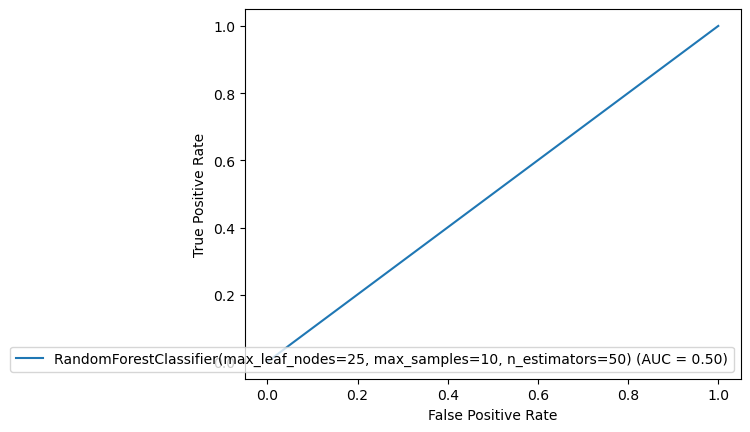

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc= metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc= roc_auc, estimator_name= final_model)
display.plot()